In [1]:
import os
%matplotlib inline
import matplotlib.pyplot as plt
import torch
import numpy as np
from pathlib import Path

params = {'axes.labelsize': 20,
          'axes.titlesize': 20,
         }
plt.rcParams.update(params)


import re
import json
from matplotlib import cm

from collections import defaultdict

from matplotlib.ticker import FormatStrFormatter

path = Path.cwd()/'logs'
path

PosixPath('/Users/davoodwadi/supp/CIFAR-10/lr invariance/logs')

# create means and stds

In [2]:
def get_hp(f):
    with open(f, 'r') as file:
        data = json.load(file)
    
    optim = re.findall(r'(?<!\d)[a-zA-z]+', f.name)[1]
    
#     if optim!=optimName:
#         return None
    
    lr = re.findall(r'\d+e-\d+|\d+.\d+|\d+', f.name)[0]
    try:
        seed = re.findall(r'\d+e-\d+|\d+.\d+|\d+', f.name)[-1]
    except:
        print(f.name)
    hps = {'optimizer':optim,
           'lr':float(lr),
           'seed': seed,
#            'wd':float(comps[1]),
           'train_acc':data['train_acc'],
           'test_acc':data['test_acc'],
           'train_loss':data['train_loss'],
           'test_loss':data['test_loss'],
           'epoch_time':data['epoch_time']
          }

    return hps

# class Optimized(object):
#     def __init__(self, path):
#         self.files = [f for f in path.iterdir()]
#         self.logs = 

        

In [3]:
files = [f for f in path.iterdir()]
files

[PosixPath('/Users/davoodwadi/supp/CIFAR-10/lr invariance/logs/resnet-adabelief-lr0.0005-wdecay0.2-eps1e-08-seed44.json'),
 PosixPath('/Users/davoodwadi/supp/CIFAR-10/lr invariance/logs/resnet-activebelief-lr5e-05-wdecay2.0-eps1e-08-seed44.json'),
 PosixPath('/Users/davoodwadi/supp/CIFAR-10/lr invariance/logs/resnet-activesgd-lr0.1-wdecay0.001-seed44.json'),
 PosixPath('/Users/davoodwadi/supp/CIFAR-10/lr invariance/logs/resnet-sgd-lr0.001-wdecay0.1-seed43.json'),
 PosixPath('/Users/davoodwadi/supp/CIFAR-10/lr invariance/logs/resnet-activesgd-lr1e-06-wdecay100.00000000000001-seed44.json'),
 PosixPath('/Users/davoodwadi/supp/CIFAR-10/lr invariance/logs/resnet-sgd-lr0.05-wdecay0.002-seed44.json'),
 PosixPath('/Users/davoodwadi/supp/CIFAR-10/lr invariance/logs/resnet-activesgd-lr0.001-wdecay0.1-seed42.json'),
 PosixPath('/Users/davoodwadi/supp/CIFAR-10/lr invariance/logs/resnet-activeradam-lr0.0005-wdecay0.2-seed42.json'),
 PosixPath('/Users/davoodwadi/supp/CIFAR-10/lr invariance/logs/resn

In [4]:
cmap = cm.tab20

In [5]:
logs = [get_hp(f) for f in files] 
logs.sort(key=lambda i: (i['lr']))

len(logs)

258

In [6]:
# verify seeds
seeds=set()
for log in logs:
    seed = log['seed']
    seeds.add(seed)

print(seeds)

{'43', '44', '42'}


In [7]:
lrs = sorted(list(set([get_hp(f)['lr'] for f in files])), reverse=True)
lr2c=dict()
for lr in lrs:
    index = lrs.index(lr)
    if index>17:
        index-=18
    lr2c[lr]=cmap(index*2)
lr2c

{0.1: (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0),
 0.05: (1.0, 0.4980392156862745, 0.054901960784313725, 1.0),
 0.01: (0.17254901960784313, 0.6274509803921569, 0.17254901960784313, 1.0),
 0.005: (0.8392156862745098, 0.15294117647058825, 0.1568627450980392, 1.0),
 0.001: (0.5803921568627451, 0.403921568627451, 0.7411764705882353, 1.0),
 0.0005: (0.5490196078431373, 0.33725490196078434, 0.29411764705882354, 1.0),
 0.0001: (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0),
 5e-05: (0.4980392156862745, 0.4980392156862745, 0.4980392156862745, 1.0),
 1e-05: (0.7372549019607844, 0.7411764705882353, 0.13333333333333333, 1.0),
 5e-06: (0.09019607843137255, 0.7450980392156863, 0.8117647058823529, 1.0),
 1e-06: (0.6196078431372549, 0.8549019607843137, 0.8980392156862745, 1.0),
 5e-07: (0.6196078431372549, 0.8549019607843137, 0.8980392156862745, 1.0),
 1e-07: (0.6196078431372549, 0.8549019607843137, 0.8980392156862745, 1.0)}

# 3runs

## Belief

In [8]:
optim1 = 'activebelief'
optim2 = 'adabelief'

In [9]:
test_accs1=defaultdict(lambda : [])
test_accs2=defaultdict(lambda : [])
for log in logs:
    optimizer = log['optimizer']
    if optimizer!=optim1 and optimizer!=optim2 : continue
    lr = log['lr']
    seed = log['seed']
#     if lr<1e-6: continue
    if optimizer==optim1:
        test_accs1[lr].append(log['test_acc'])
    else:
        test_accs2[lr].append(log['test_acc'])
    

activebelief: 5e-07; (3, 200)
activebelief: 1e-06; (3, 200)
activebelief: 5e-06; (3, 200)
activebelief: 1e-05; (3, 200)
activebelief: 5e-05; (3, 200)
activebelief: 0.0001; (3, 200)
activebelief: 0.0005; (3, 200)
activebelief: 0.001; (3, 200)
activebelief: 0.005; (3, 200)
adabelief: 5e-07; (3, 200)
adabelief: 1e-06; (3, 200)
adabelief: 5e-06; (3, 200)
adabelief: 1e-05; (3, 200)
adabelief: 5e-05; (3, 200)
adabelief: 0.0001; (3, 200)
adabelief: 0.0005; (3, 200)
adabelief: 0.001; (3, 200)
adabelief: 0.005; (3, 200)


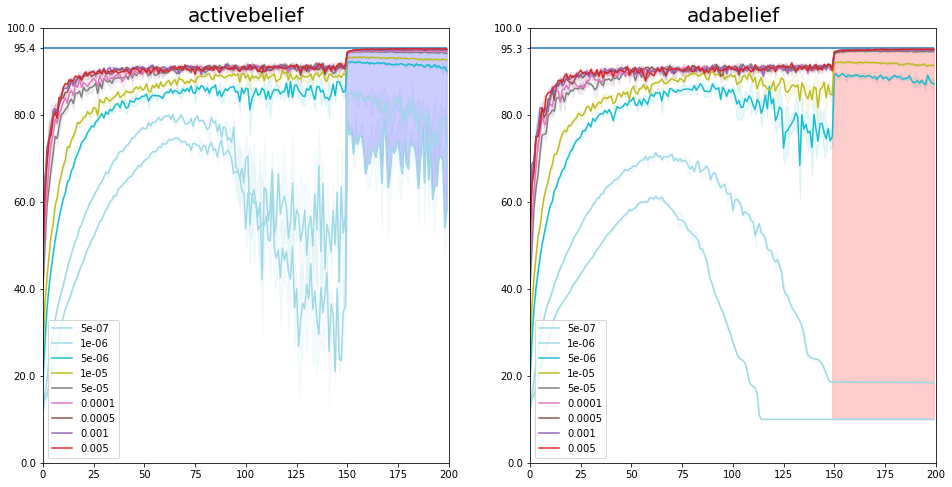

In [10]:
fig, axes = plt.subplots(1,2, figsize=(16,8))
# linesty = {optim1: '-', optim2: 'dotted'}
alpha = .1

thresh = 5e-7

test_acc1=[]
test_acc2=[]
maxi1=maxi2=0
for lr in test_accs1.keys():
    optimizer = optim1
#     if optimizer!=optim1 and optimizer!=optim2 : continue

#     linestyle = linesty[optimizer]
#     lr = log['lr']
#     seed = log['seed']
    if lr<thresh: continue
#     lr = log['lr']
#     wd = log['wd']
#     if optimizer==optim1:
#         test_accs1[lr].append(log['test_acc'])
#     else:
#         test_accs2[lr].append(log['test_acc'])
#     print(f'{optimizer} with seed {seed} and lr {lr} added')
#     if optimizer==optim1:
    arr = np.array(test_accs1[lr])
    print(f'{optimizer}: {lr}; {arr.shape}')
    avg = arr.mean(0)
    std = arr.std(0)
    if maxi1<arr.max():
        maxi1=arr.max()
        
    test_acc1.append(avg)

    axes[0].plot(avg, label=f"{lr}", c=lr2c[lr])
    axes[0].fill_between(range(200), avg-std, avg+std, color=lr2c[lr], alpha=alpha)

for lr in test_accs2.keys():
    if lr<thresh: continue
    optimizer = optim2
    arr = np.array(test_accs2[lr])
    print(f'{optimizer}: {lr}; {arr.shape}')
    avg = arr.mean(0)
    std = arr.std(0)

    if maxi2<arr.max():
        maxi2=arr.max()
        
    test_acc2.append(avg)

    axes[1].plot(avg, label=f"{lr}", c=lr2c[lr])
    axes[1].fill_between(range(200), avg-std, avg+std, color=lr2c[lr], alpha=alpha)

#         axes[0].plot(train_acc, label=f"{lr}", c=lr2c[lr], linestyle=linestyle)
    #         axes[0].set_ylim(70.5,100)
#     axes.set_xlim(149,200)
test_acc1 = np.array(test_acc1)
test_acc2 = np.array(test_acc2)
max1 = test_acc1.max(0)
max2 = test_acc2.max(0)
min1 = test_acc1.min(0)
min2 = test_acc2.min(0)

axes[0].fill_between(range(149,200), min1[149:], max1[149:], color='blue', alpha=.2)
axes[1].fill_between(range(149,200), min2[149:], max2[149:], color='red', alpha=0.2)

# axes.set_ylim(85, 95.7)
axes[0].set_xlim(0,200)
axes[1].set_xlim(0,200)

axes[0].hlines(maxi1, 0, 199)
# axes[0].hlines(min1, 0, 199)
yticks0 = axes[0].get_yticks()
yt0 = list(yticks0)
yt0.append(maxi1)
axes[0].set_yticks(yt0)

axes[1].hlines(maxi2, 0, 199)
# axes[1].hlines(min2, 0, 199)
yticks1 = axes[1].get_yticks()
yt1 = list(yticks1)
yt1.append(maxi2)
axes[1].set_yticks(yt1)

axes[0].yaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
axes[1].yaxis.set_major_formatter(FormatStrFormatter('%0.1f'))

axes[0].set_title(optim1)
axes[1].set_title(optim2)
axes[0].legend(loc='lower left')
axes[1].legend(loc='lower left')

## radam

In [11]:
optim1 = 'activeradam'
optim2 = 'radam'

In [12]:
test_accs1=defaultdict(lambda : [])
test_accs2=defaultdict(lambda : [])
for log in logs:
    optimizer = log['optimizer']
    if optimizer!=optim1 and optimizer!=optim2 : continue
    lr = log['lr']
    seed = log['seed']
#     if lr<1e-6: continue
    if optimizer==optim1:
        test_accs1[lr].append(log['test_acc'])
    else:
        test_accs2[lr].append(log['test_acc'])
    

activeradam: 5e-07; (3, 200)
activeradam: 1e-06; (3, 200)
activeradam: 5e-06; (3, 200)
activeradam: 1e-05; (3, 200)
activeradam: 5e-05; (3, 200)
activeradam: 0.0001; (3, 200)
activeradam: 0.0005; (3, 200)
activeradam: 0.001; (3, 200)
activeradam: 0.005; (3, 200)
radam: 5e-07; (3, 200)
radam: 1e-06; (3, 200)
radam: 5e-06; (3, 200)
radam: 1e-05; (3, 200)
radam: 5e-05; (3, 200)
radam: 0.0001; (3, 200)
radam: 0.0005; (3, 200)
radam: 0.001; (3, 200)
radam: 0.005; (3, 200)


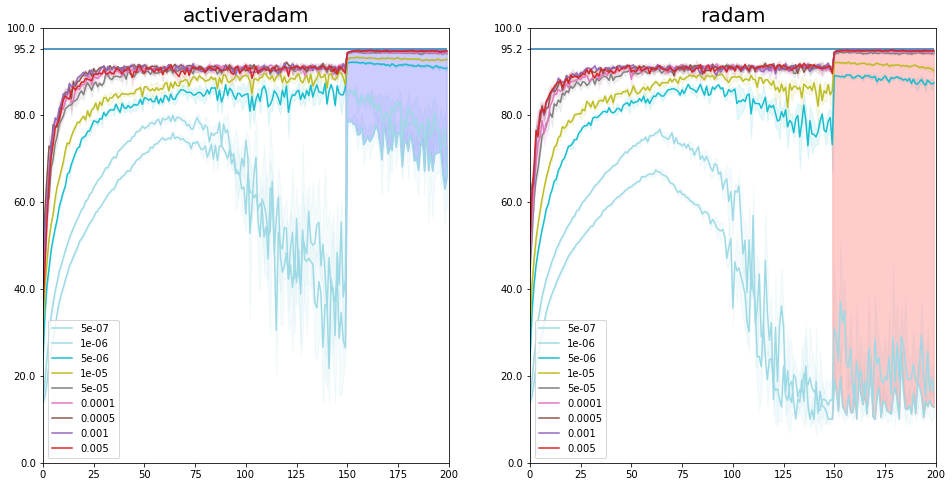

In [13]:
fig, axes = plt.subplots(1,2, figsize=(16,8))
# linesty = {optim1: '-', optim2: 'dotted'}
alpha = .1

thresh = 5e-7

test_acc1=[]
test_acc2=[]
maxi1=maxi2=0
for lr in test_accs1.keys():
    optimizer = optim1
    if lr<thresh: continue
#     if optimizer!=optim1 and optimizer!=optim2 : continue

#     linestyle = linesty[optimizer]
#     lr = log['lr']
#     seed = log['seed']
#     if lr<1e-7: continue
#     lr = log['lr']
#     wd = log['wd']
#     if optimizer==optim1:
#         test_accs1[lr].append(log['test_acc'])
#     else:
#         test_accs2[lr].append(log['test_acc'])
#     print(f'{optimizer} with seed {seed} and lr {lr} added')
#     if optimizer==optim1:
    arr = np.array(test_accs1[lr])
    print(f'{optimizer}: {lr}; {arr.shape}')
    avg = arr.mean(0)
    std = arr.std(0)
    if maxi1<arr.max():
        maxi1=arr.max()
        
    test_acc1.append(avg)

    axes[0].plot(avg, label=f"{lr}", c=lr2c[lr])
    axes[0].fill_between(range(200), avg-std, avg+std, color=lr2c[lr], alpha=alpha)

for lr in test_accs2.keys():
    if lr<thresh: continue
    optimizer = optim2
    arr = np.array(test_accs2[lr])
    print(f'{optimizer}: {lr}; {arr.shape}')
    avg = arr.mean(0)
    std = arr.std(0)

    if maxi2<arr.max():
        maxi2=arr.max()
        
    test_acc2.append(avg)

    axes[1].plot(avg, label=f"{lr}", c=lr2c[lr])
    axes[1].fill_between(range(200), avg-std, avg+std, color=lr2c[lr], alpha=alpha)

#         axes[0].plot(train_acc, label=f"{lr}", c=lr2c[lr], linestyle=linestyle)
    #         axes[0].set_ylim(70.5,100)
#     axes.set_xlim(149,200)
test_acc1 = np.array(test_acc1)
test_acc2 = np.array(test_acc2)
max1 = test_acc1.max(0)
max2 = test_acc2.max(0)
min1 = test_acc1.min(0)
min2 = test_acc2.min(0)

axes[0].fill_between(range(149,200), min1[149:], max1[149:], color='blue', alpha=.2)
axes[1].fill_between(range(149,200), min2[149:], max2[149:], color='red', alpha=0.2)

# axes.set_ylim(85, 95.7)
axes[0].set_xlim(0,200)
axes[1].set_xlim(0,200)

axes[0].hlines(maxi1, 0, 199)
# axes[0].hlines(min1, 0, 199)
yticks0 = axes[0].get_yticks()
yt0 = list(yticks0)
yt0.append(maxi1)
axes[0].set_yticks(yt0)

axes[1].hlines(maxi2, 0, 199)
# axes[1].hlines(min2, 0, 199)
yticks1 = axes[1].get_yticks()
yt1 = list(yticks1)
yt1.append(maxi2)
axes[1].set_yticks(yt1)

axes[0].yaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
axes[1].yaxis.set_major_formatter(FormatStrFormatter('%0.1f'))

axes[0].set_title(optim1)
axes[1].set_title(optim2)
axes[0].legend(loc='lower left')
axes[1].legend(loc='lower left')

## adamw

In [14]:
optim1 = 'activeadam'
optim2 = 'adamw'

In [15]:
test_accs1=defaultdict(lambda : [])
test_accs2=defaultdict(lambda : [])
for log in logs:
    optimizer = log['optimizer']
    if optimizer!=optim1 and optimizer!=optim2 : continue
    lr = log['lr']
    seed = log['seed']
#     if lr<1e-6: continue
    if optimizer==optim1:
        test_accs1[lr].append(log['test_acc'])
    else:
        test_accs2[lr].append(log['test_acc'])
    

activeadam: 5e-07; (3, 200)
activeadam: 1e-06; (3, 200)
activeadam: 5e-06; (3, 200)
activeadam: 1e-05; (3, 200)
activeadam: 5e-05; (3, 200)
activeadam: 0.0001; (3, 200)
activeadam: 0.0005; (3, 200)
activeadam: 0.001; (3, 200)
activeadam: 0.005; (3, 200)
adamw: 5e-07; (3, 200)
adamw: 1e-06; (3, 200)
adamw: 5e-06; (3, 200)
adamw: 1e-05; (3, 200)
adamw: 5e-05; (3, 200)
adamw: 0.0001; (3, 200)
adamw: 0.0005; (3, 200)
adamw: 0.001; (3, 200)
adamw: 0.005; (3, 200)


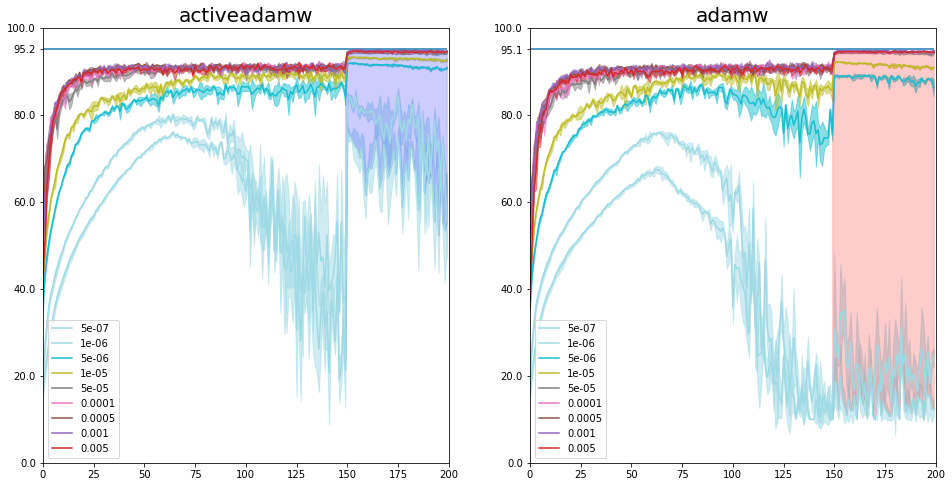

In [16]:
fig, axes = plt.subplots(1,2, figsize=(16,8))
# linesty = {optim1: '-', optim2: 'dotted'}
alpha = .5

thresh = 5e-7

test_acc1=[]
test_acc2=[]
maxi1=maxi2=0
for lr in test_accs1.keys():
    if lr<thresh: continue
    optimizer = optim1
#     if optimizer!=optim1 and optimizer!=optim2 : continue

#     linestyle = linesty[optimizer]
#     lr = log['lr']
#     seed = log['seed']
#     if lr<1e-7: continue
#     lr = log['lr']
#     wd = log['wd']
#     if optimizer==optim1:
#         test_accs1[lr].append(log['test_acc'])
#     else:
#         test_accs2[lr].append(log['test_acc'])
#     print(f'{optimizer} with seed {seed} and lr {lr} added')
#     if optimizer==optim1:
    arr = np.array(test_accs1[lr])
    print(f'{optimizer}: {lr}; {arr.shape}')
#     if arr.shape==(3,): 
#         for l in arr:
#             print(len(l))
    avg = arr.mean(0)
    std = arr.std(0)
    if maxi1<arr.max():
        maxi1=arr.max()
        
    test_acc1.append(avg)

    axes[0].plot(avg, label=f"{lr}", c=lr2c[lr])
    axes[0].fill_between(range(200), avg-std, avg+std, color=lr2c[lr], alpha=alpha)

for lr in test_accs2.keys():
    if lr<thresh: continue
    optimizer = optim2
    arr = np.array(test_accs2[lr])
    print(f'{optimizer}: {lr}; {arr.shape}')
    avg = arr.mean(0)
    std = arr.std(0)

    if maxi2<arr.max():
        maxi2=arr.max()
        
    test_acc2.append(avg)

    axes[1].plot(avg, label=f"{lr}", c=lr2c[lr])
    axes[1].fill_between(range(200), avg-std, avg+std, color=lr2c[lr], alpha=alpha)

#         axes[0].plot(train_acc, label=f"{lr}", c=lr2c[lr], linestyle=linestyle)
    #         axes[0].set_ylim(70.5,100)
#     axes.set_xlim(149,200)
test_acc1 = np.array(test_acc1)
test_acc2 = np.array(test_acc2)
max1 = test_acc1.max(0)
max2 = test_acc2.max(0)
min1 = test_acc1.min(0)
min2 = test_acc2.min(0)

axes[0].fill_between(range(149,200), min1[149:], max1[149:], color='blue', alpha=.2)
axes[1].fill_between(range(149,200), min2[149:], max2[149:], color='red', alpha=0.2)

# axes.set_ylim(85, 95.7)
axes[0].set_xlim(0,200)
axes[1].set_xlim(0,200)

axes[0].hlines(maxi1, 0, 199)
# axes[0].hlines(min1, 0, 199)
yticks0 = axes[0].get_yticks()
yt0 = list(yticks0)
yt0.append(maxi1)
axes[0].set_yticks(yt0)

axes[1].hlines(maxi2, 0, 199)
# axes[1].hlines(min2, 0, 199)
yticks1 = axes[1].get_yticks()
yt1 = list(yticks1)
yt1.append(maxi2)
axes[1].set_yticks(yt1)

axes[0].yaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
axes[1].yaxis.set_major_formatter(FormatStrFormatter('%0.1f'))

axes[0].set_title('activeadamw')
axes[1].set_title(optim2)
axes[0].legend(loc='lower left')
axes[1].legend(loc='lower left')

## sgd

In [17]:
optim1 = 'activesgd'
optim2 = 'sgd'

In [18]:
test_accs1=defaultdict(lambda : [])
test_accs2=defaultdict(lambda : [])
for log in logs:
    optimizer = log['optimizer']
    if optimizer!=optim1 and optimizer!=optim2 : continue
    lr = log['lr']
    seed = log['seed']
#     if lr<1e-6: continue
    if optimizer==optim1:
        test_accs1[lr].append(log['test_acc'])
    else:
        test_accs2[lr].append(log['test_acc'])
    

activesgd: 1e-05; (3, 200)
activesgd: 5e-05; (3, 200)
activesgd: 0.0001; (3, 200)
activesgd: 0.0005; (3, 200)
activesgd: 0.001; (3, 200)
activesgd: 0.005; (3, 200)
activesgd: 0.01; (3, 200)
activesgd: 0.05; (3, 200)
activesgd: 0.1; (3, 200)
sgd: 1e-05; (3, 200)
sgd: 5e-05; (3, 200)
sgd: 0.0001; (3, 200)
sgd: 0.0005; (3, 200)
sgd: 0.001; (3, 200)
sgd: 0.005; (3, 200)
sgd: 0.01; (3, 200)
sgd: 0.05; (3, 200)
sgd: 0.1; (3, 200)


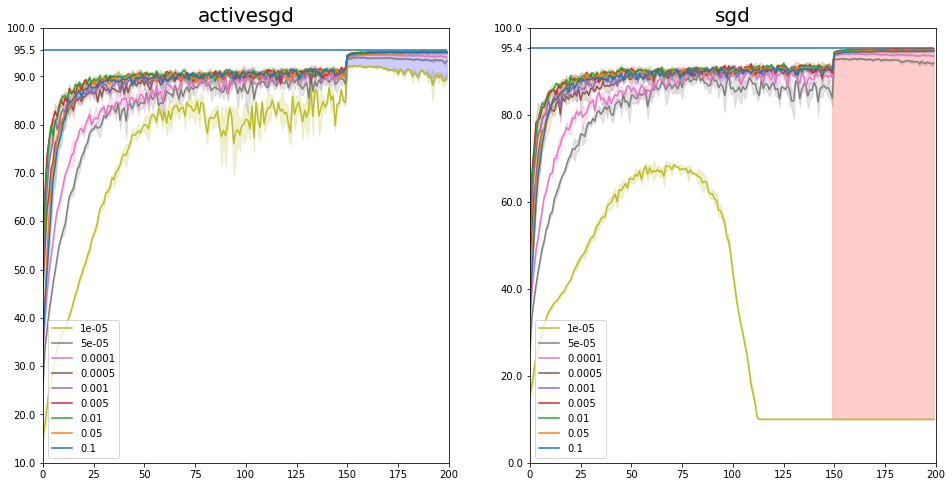

In [19]:
fig, axes = plt.subplots(1,2, figsize=(16,8))
# linesty = {optim1: '-', optim2: 'dotted'}
alpha = .2

thresh = 1e-5

test_acc1=[]
test_acc2=[]
maxi1=maxi2=0
for lr in test_accs1.keys():
    optimizer = optim1
#     if optimizer!=optim1 and optimizer!=optim2 : continue

#     linestyle = linesty[optimizer]
#     lr = log['lr']
#     seed = log['seed']
    if lr<thresh: continue
#     lr = log['lr']
#     wd = log['wd']
#     if optimizer==optim1:
#         test_accs1[lr].append(log['test_acc'])
#     else:
#         test_accs2[lr].append(log['test_acc'])
#     print(f'{optimizer} with seed {seed} and lr {lr} added')
#     if optimizer==optim1:
    arr = np.array(test_accs1[lr])
    print(f'{optimizer}: {lr}; {arr.shape}')
    avg = arr.mean(0)
    std = arr.std(0)
    if maxi1<arr.max():
        maxi1=arr.max()
        
    test_acc1.append(avg)

    axes[0].plot(avg, label=f"{lr}", c=lr2c[lr])
    axes[0].fill_between(range(200), avg-std, avg+std, color=lr2c[lr], alpha=alpha)

for lr in test_accs2.keys():
    if lr<thresh: continue
    optimizer = optim2
    arr = np.array(test_accs2[lr])
    print(f'{optimizer}: {lr}; {arr.shape}')
    avg = arr.mean(0)
    std = arr.std(0)

    if maxi2<arr.max():
        maxi2=arr.max()
        
    test_acc2.append(avg)

    axes[1].plot(avg, label=f"{lr}", c=lr2c[lr])
    axes[1].fill_between(range(200), avg-std, avg+std, color=lr2c[lr], alpha=alpha)

#         axes[0].plot(train_acc, label=f"{lr}", c=lr2c[lr], linestyle=linestyle)
    #         axes[0].set_ylim(70.5,100)
#     axes.set_xlim(149,200)
test_acc1 = np.array(test_acc1)
test_acc2 = np.array(test_acc2)
max1 = test_acc1.max(0)
max2 = test_acc2.max(0)
min1 = test_acc1.min(0)
min2 = test_acc2.min(0)

axes[0].fill_between(range(149,200), min1[149:], max1[149:], color='blue', alpha=.2)
axes[1].fill_between(range(149,200), min2[149:], max2[149:], color='red', alpha=0.2)

# axes.set_ylim(85, 95.7)
axes[0].set_xlim(0,200)
axes[1].set_xlim(0,200)

axes[0].hlines(maxi1, 0, 199)
# axes[0].hlines(min1, 0, 199)
yticks0 = axes[0].get_yticks()
yt0 = list(yticks0)
yt0.append(maxi1)
axes[0].set_yticks(yt0)

axes[1].hlines(maxi2, 0, 199)
# axes[1].hlines(min2, 0, 199)
yticks1 = axes[1].get_yticks()
yt1 = list(yticks1)
yt1.append(maxi2)
axes[1].set_yticks(yt1)

axes[0].yaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
axes[1].yaxis.set_major_formatter(FormatStrFormatter('%0.1f'))

axes[0].set_title(optim1)
axes[1].set_title(optim2)
axes[0].legend(loc='lower left')
axes[1].legend(loc='lower left')

## all optims

0 activeadam adamw
activeadam: 5e-07; (3, 200)
activeadam: 1e-06; (3, 200)
activeadam: 5e-06; (3, 200)
activeadam: 1e-05; (3, 200)
activeadam: 5e-05; (3, 200)
activeadam: 0.0001; (3, 200)
activeadam: 0.0005; (3, 200)
activeadam: 0.001; (3, 200)
activeadam: 0.005; (3, 200)
adamw: 5e-07; (3, 200)
adamw: 1e-06; (3, 200)
adamw: 5e-06; (3, 200)
adamw: 1e-05; (3, 200)
adamw: 5e-05; (3, 200)
adamw: 0.0001; (3, 200)
adamw: 0.0005; (3, 200)
adamw: 0.001; (3, 200)
adamw: 0.005; (3, 200)
1 activesgd sgd
activesgd: 1e-05; (3, 200)
activesgd: 5e-05; (3, 200)
activesgd: 0.0001; (3, 200)
activesgd: 0.0005; (3, 200)
activesgd: 0.001; (3, 200)
activesgd: 0.005; (3, 200)
activesgd: 0.01; (3, 200)
activesgd: 0.05; (3, 200)
activesgd: 0.1; (3, 200)
sgd: 1e-05; (3, 200)
sgd: 5e-05; (3, 200)
sgd: 0.0001; (3, 200)
sgd: 0.0005; (3, 200)
sgd: 0.001; (3, 200)
sgd: 0.005; (3, 200)
sgd: 0.01; (3, 200)
sgd: 0.05; (3, 200)
sgd: 0.1; (3, 200)
2 activeradam radam
activeradam: 5e-07; (3, 200)
activeradam: 1e-06; (3, 2

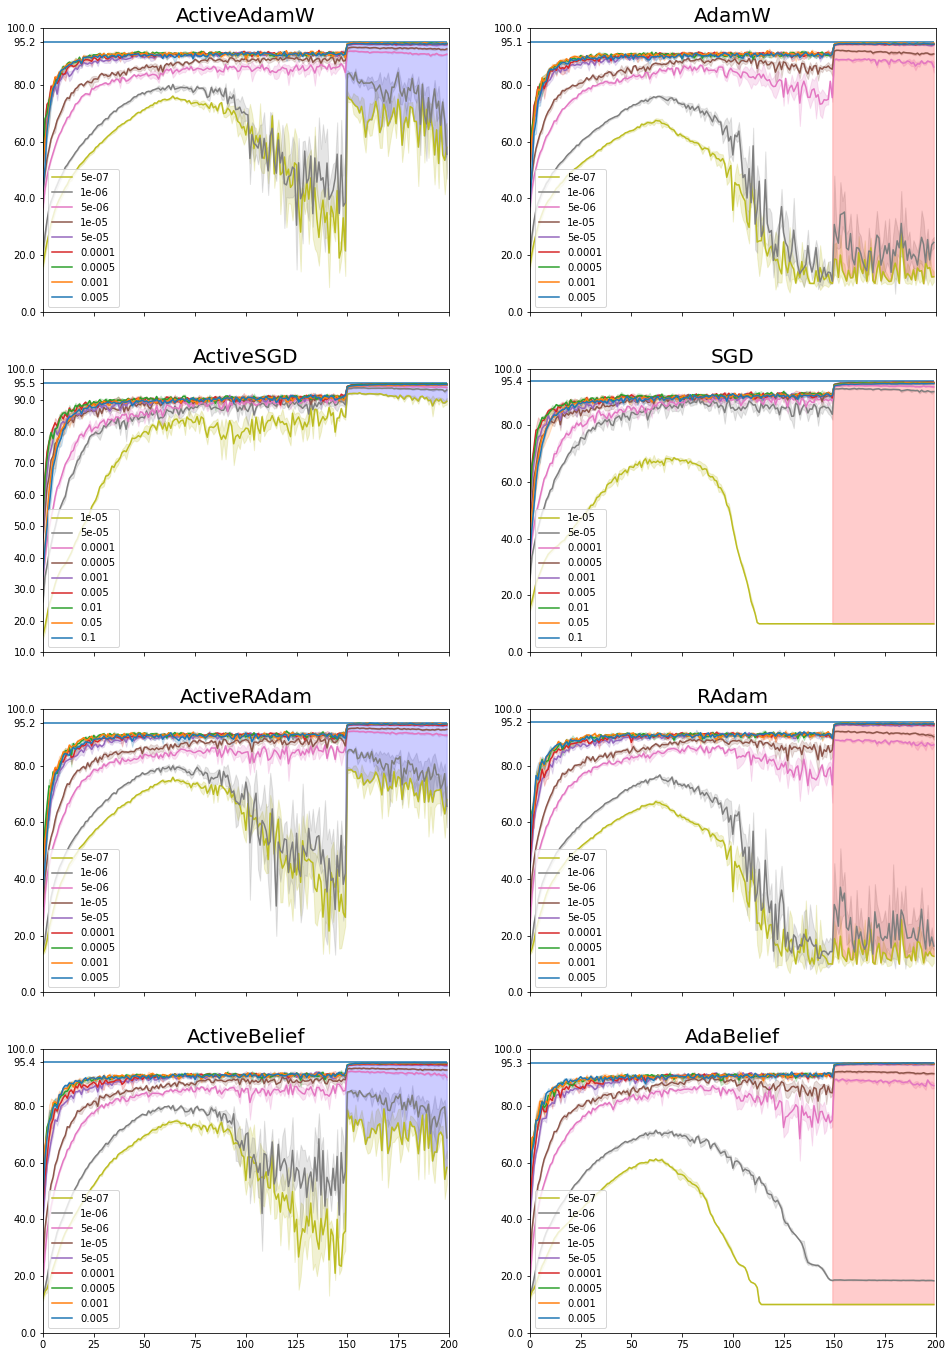

In [20]:
optimDict = {'activeadam':'ActiveAdamW', 
                       'activebelief': 'ActiveBelief', 
                       'activeradam': 'ActiveRAdam', 
                       'activesgd': 'ActiveSGD', 
                       'adamw': 'AdamW', 
                       'adabelief': 'AdaBelief',
                       'radam': 'RAdam', 
                       'sgd': 'SGD'}
optimList = [
    ('activeadam', 'adamw'),
    ('activesgd', 'sgd'),
    ('activeradam', 'radam'),
    ('activebelief', 'adabelief')
]
threshDict={'activeadam':5e-7, 
                       'activebelief':5e-7, 
                       'activeradam':5e-7, 
                       'activesgd':1e-5, 
                       'adamw':5e-7, 
                       'adabelief':5e-7,
                       'radam':5e-7, 
                       'sgd':1e-5,    
}

fig, axes = plt.subplots(4,2, figsize=(16,24), sharex=True)
for ii, (optim1, optim2) in enumerate(optimList):
    print(ii, optim1, optim2)

    lrs = sorted(list(set([get_hp(f)['lr'] for f in files if get_hp(f)['optimizer']==optim1])), reverse=True)
    lr2c=dict()
    for lr in lrs:
        index = lrs.index(lr)
        if index>17:
            index-=18
        lr2c[lr]=cmap(index*2)


    test_accs1=defaultdict(lambda : [])
    test_accs2=defaultdict(lambda : [])
    for log in logs:
        optimizer = log['optimizer']
        if optimizer!=optim1 and optimizer!=optim2 : continue
        lr = log['lr']
        seed = log['seed']
    #     if lr<1e-6: continue
        if optimizer==optim1:
            test_accs1[lr].append(log['test_acc'])
        else:
            test_accs2[lr].append(log['test_acc'])
    

# linesty = {optim1: '-', optim2: 'dotted'}
    alpha = .2

    thresh = threshDict[optim1]
    threshH = 1 

    test_acc1=[]
    test_acc2=[]
    maxi1=maxi2=0
    for lr in test_accs1.keys():
        optimizer = optim1
    #     if optimizer!=optim1 and optimizer!=optim2 : continue

    #     linestyle = linesty[optimizer]
    #     lr = log['lr']
    #     seed = log['seed']
        if lr<thresh: continue
    #     lr = log['lr']
    #     wd = log['wd']
    #     if optimizer==optim1:
    #         test_accs1[lr].append(log['test_acc'])
    #     else:
    #         test_accs2[lr].append(log['test_acc'])
    #     print(f'{optimizer} with seed {seed} and lr {lr} added')
    #     if optimizer==optim1:
        arr = np.array(test_accs1[lr])
        print(f'{optimizer}: {lr}; {arr.shape}')
        avg = arr.mean(0)
        std = arr.std(0)
        if maxi1<arr.max():
            maxi1=arr.max()

        test_acc1.append(avg)

        axes[ii,0].plot(avg, label=f"{lr}", c=lr2c[lr])
        axes[ii,0].fill_between(range(200), avg-std, avg+std, color=lr2c[lr], alpha=alpha)

    for lr in test_accs2.keys():
        if lr<thresh: continue
        optimizer = optim2
        arr = np.array(test_accs2[lr])
        print(f'{optimizer}: {lr}; {arr.shape}')
        avg = arr.mean(0)
        std = arr.std(0)

        if maxi2<arr.max():
            maxi2=arr.max()

        test_acc2.append(avg)

        axes[ii,1].plot(avg, label=f"{lr}", c=lr2c[lr])
        axes[ii,1].fill_between(range(200), avg-std, avg+std, color=lr2c[lr], alpha=alpha)

    #         axes[0].plot(train_acc, label=f"{lr}", c=lr2c[lr], linestyle=linestyle)
        #         axes[0].set_ylim(70.5,100)
    #     axes.set_xlim(149,200)
    test_acc1 = np.array(test_acc1)
    test_acc2 = np.array(test_acc2)
    max1 = test_acc1.max(0)
    max2 = test_acc2.max(0)
    min1 = test_acc1.min(0)
    min2 = test_acc2.min(0)

    axes[ii,0].fill_between(range(149,200), min1[149:], max1[149:], color='blue', alpha=.2)
    axes[ii,1].fill_between(range(149,200), min2[149:], max2[149:], color='red', alpha=0.2)

    # axes.set_ylim(85, 95.7)
    axes[ii,0].set_xlim(0,200)
    axes[ii,1].set_xlim(0,200)

    axes[ii,0].hlines(maxi1, 0, 199)
    # axes[0].hlines(min1, 0, 199)
    yticks0 = axes[ii,0].get_yticks()
    yt0 = list(yticks0)
    yt0.append(maxi1)
    axes[ii,0].set_yticks(yt0)

    axes[ii,1].hlines(maxi2, 0, 199)
    # axes[1].hlines(min2, 0, 199)
    yticks1 = axes[ii,1].get_yticks()
    yt1 = list(yticks1)
    yt1.append(maxi2)
    axes[ii,1].set_yticks(yt1)

    axes[ii,0].yaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
    axes[ii,1].yaxis.set_major_formatter(FormatStrFormatter('%0.1f'))

    axes[ii,0].set_title(optimDict[optim1])
    axes[ii,1].set_title(optimDict[optim2])
    axes[ii,0].legend(loc='lower left')
    axes[ii,1].legend(loc='lower left')

In [32]:
fig.savefig('./cifar10accs.png', dpi=300, bbox_inches='tight')

## error bar

0 activeadam adamw
activeadam: 5e-07; (3, 200)
activeadam: 1e-06; (3, 200)
activeadam: 5e-06; (3, 200)
activeadam: 1e-05; (3, 200)
activeadam: 5e-05; (3, 200)
activeadam: 0.0001; (3, 200)
activeadam: 0.0005; (3, 200)
activeadam: 0.001; (3, 200)
activeadam: 0.005; (3, 200)
adamw: 5e-07; (3, 200)
adamw: 1e-06; (3, 200)
adamw: 5e-06; (3, 200)
adamw: 1e-05; (3, 200)
adamw: 5e-05; (3, 200)
adamw: 0.0001; (3, 200)
adamw: 0.0005; (3, 200)
adamw: 0.001; (3, 200)
adamw: 0.005; (3, 200)
1 activesgd sgd
activesgd: 1e-05; (3, 200)
activesgd: 5e-05; (3, 200)
activesgd: 0.0001; (3, 200)
activesgd: 0.0005; (3, 200)
activesgd: 0.001; (3, 200)
activesgd: 0.005; (3, 200)
activesgd: 0.01; (3, 200)
activesgd: 0.05; (3, 200)
activesgd: 0.1; (3, 200)
sgd: 1e-05; (3, 200)
sgd: 5e-05; (3, 200)
sgd: 0.0001; (3, 200)
sgd: 0.0005; (3, 200)
sgd: 0.001; (3, 200)
sgd: 0.005; (3, 200)
sgd: 0.01; (3, 200)
sgd: 0.05; (3, 200)
sgd: 0.1; (3, 200)
2 activeradam radam
activeradam: 5e-07; (3, 200)
activeradam: 1e-06; (3, 2

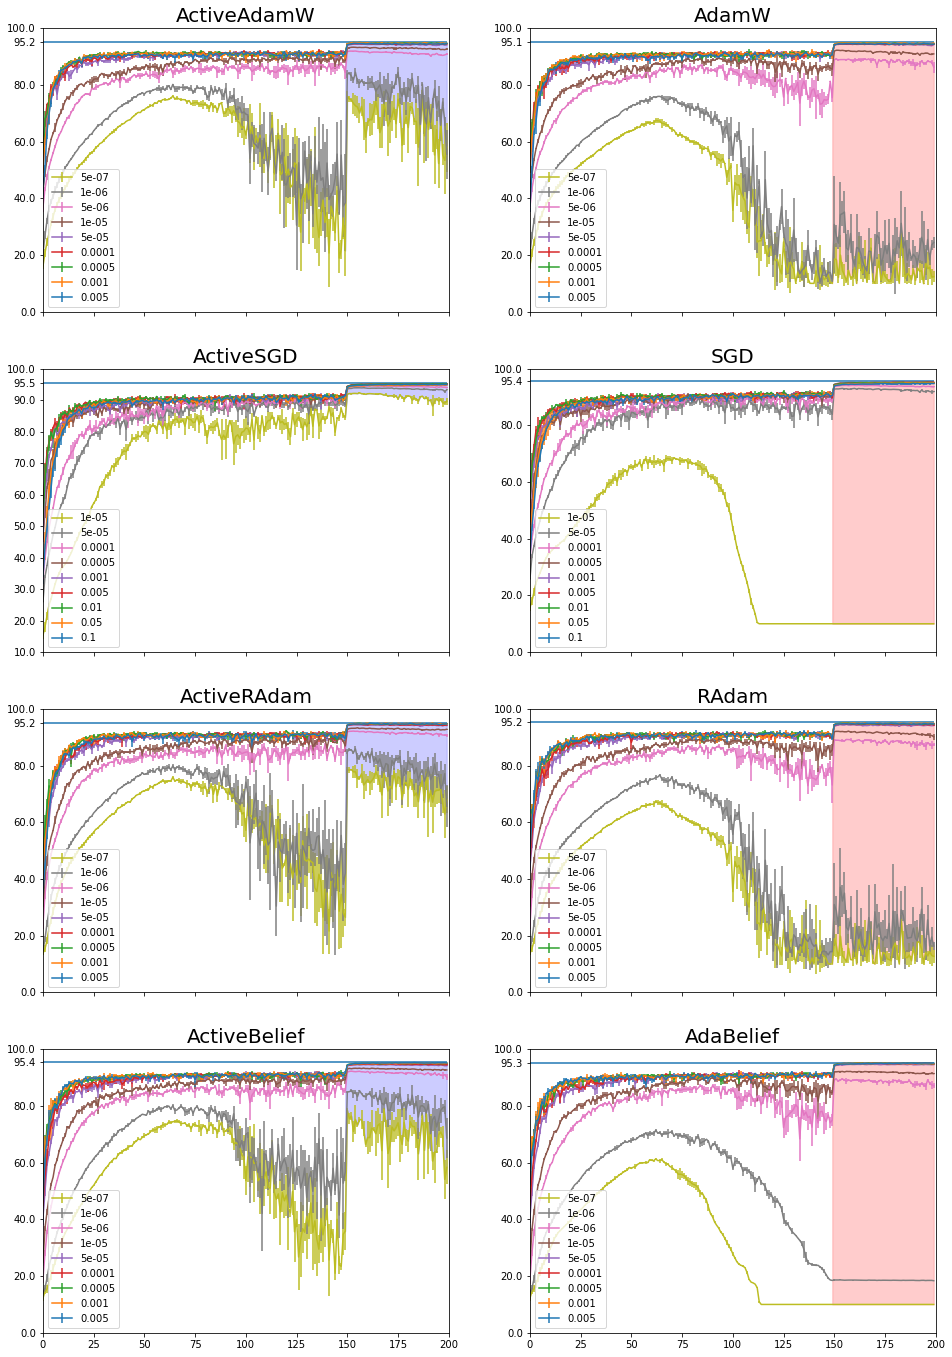

In [21]:
optimDict = {'activeadam':'ActiveAdamW', 
                       'activebelief': 'ActiveBelief', 
                       'activeradam': 'ActiveRAdam', 
                       'activesgd': 'ActiveSGD', 
                       'adamw': 'AdamW', 
                       'adabelief': 'AdaBelief',
                       'radam': 'RAdam', 
                       'sgd': 'SGD'}
optimList = [
    ('activeadam', 'adamw'),
    ('activesgd', 'sgd'),
    ('activeradam', 'radam'),
    ('activebelief', 'adabelief')
]
threshDict={'activeadam':5e-7, 
                       'activebelief':5e-7, 
                       'activeradam':5e-7, 
                       'activesgd':1e-5, 
                       'adamw':5e-7, 
                       'adabelief':5e-7,
                       'radam':5e-7, 
                       'sgd':1e-5,    
}

fig, axes = plt.subplots(4,2, figsize=(16,24), sharex=True)
for ii, (optim1, optim2) in enumerate(optimList):
    print(ii, optim1, optim2)

    lrs = sorted(list(set([get_hp(f)['lr'] for f in files if get_hp(f)['optimizer']==optim1])), reverse=True)
    lr2c=dict()
    for lr in lrs:
        index = lrs.index(lr)
        if index>17:
            index-=18
        lr2c[lr]=cmap(index*2)


    test_accs1=defaultdict(lambda : [])
    test_accs2=defaultdict(lambda : [])
    for log in logs:
        optimizer = log['optimizer']
        if optimizer!=optim1 and optimizer!=optim2 : continue
        lr = log['lr']
        seed = log['seed']
    #     if lr<1e-6: continue
        if optimizer==optim1:
            test_accs1[lr].append(log['test_acc'])
        else:
            test_accs2[lr].append(log['test_acc'])
    

# linesty = {optim1: '-', optim2: 'dotted'}
    alpha = .2

    thresh = threshDict[optim1]
    threshH = 1 

    test_acc1=[]
    test_acc2=[]
    maxi1=maxi2=0
    for lr in test_accs1.keys():
        optimizer = optim1
    #     if optimizer!=optim1 and optimizer!=optim2 : continue

    #     linestyle = linesty[optimizer]
    #     lr = log['lr']
    #     seed = log['seed']
        if lr<thresh: continue
    #     lr = log['lr']
    #     wd = log['wd']
    #     if optimizer==optim1:
    #         test_accs1[lr].append(log['test_acc'])
    #     else:
    #         test_accs2[lr].append(log['test_acc'])
    #     print(f'{optimizer} with seed {seed} and lr {lr} added')
    #     if optimizer==optim1:
        arr = np.array(test_accs1[lr])
        print(f'{optimizer}: {lr}; {arr.shape}')
        avg = arr.mean(0)
        std = arr.std(0)
        if maxi1<arr.max():
            maxi1=arr.max()

        test_acc1.append(avg)

        axes[ii,0].errorbar(range(200),avg, yerr=std, label=f"{lr}", c=lr2c[lr])
#         axes[ii,0].fill_between(range(200), avg-std, avg+std, color=lr2c[lr], alpha=alpha)

    for lr in test_accs2.keys():
        if lr<thresh: continue
        optimizer = optim2
        arr = np.array(test_accs2[lr])
        print(f'{optimizer}: {lr}; {arr.shape}')
        avg = arr.mean(0)
        std = arr.std(0)

        if maxi2<arr.max():
            maxi2=arr.max()

        test_acc2.append(avg)

        axes[ii,1].errorbar(range(200),avg, yerr=std, label=f"{lr}", c=lr2c[lr])
#         axes[ii,1].fill_between(range(200), avg-std, avg+std, color=lr2c[lr], alpha=alpha)

    #         axes[0].plot(train_acc, label=f"{lr}", c=lr2c[lr], linestyle=linestyle)
        #         axes[0].set_ylim(70.5,100)
    #     axes.set_xlim(149,200)
    test_acc1 = np.array(test_acc1)
    test_acc2 = np.array(test_acc2)
    max1 = test_acc1.max(0)
    max2 = test_acc2.max(0)
    min1 = test_acc1.min(0)
    min2 = test_acc2.min(0)

    axes[ii,0].fill_between(range(149,200), min1[149:], max1[149:], color='blue', alpha=.2)
    axes[ii,1].fill_between(range(149,200), min2[149:], max2[149:], color='red', alpha=0.2)

    # axes.set_ylim(85, 95.7)
    axes[ii,0].set_xlim(0,200)
    axes[ii,1].set_xlim(0,200)

    axes[ii,0].hlines(maxi1, 0, 199)
    # axes[0].hlines(min1, 0, 199)
    yticks0 = axes[ii,0].get_yticks()
    yt0 = list(yticks0)
    yt0.append(maxi1)
    axes[ii,0].set_yticks(yt0)

    axes[ii,1].hlines(maxi2, 0, 199)
    # axes[1].hlines(min2, 0, 199)
    yticks1 = axes[ii,1].get_yticks()
    yt1 = list(yticks1)
    yt1.append(maxi2)
    axes[ii,1].set_yticks(yt1)

    axes[ii,0].yaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
    axes[ii,1].yaxis.set_major_formatter(FormatStrFormatter('%0.1f'))

    axes[ii,0].set_title(optimDict[optim1])
    axes[ii,1].set_title(optimDict[optim2])
    axes[ii,0].legend(loc='lower left')
    axes[ii,1].legend(loc='lower left')

## train error

0 activeadam adamw
activeadam: 5e-07; (3, 200)
activeadam: 1e-06; (3, 200)
activeadam: 5e-06; (3, 200)
activeadam: 1e-05; (3, 200)
activeadam: 5e-05; (3, 200)
activeadam: 0.0001; (3, 200)
activeadam: 0.0005; (3, 200)
activeadam: 0.001; (3, 200)
activeadam: 0.005; (3, 200)
adamw: 5e-07; (3, 200)
adamw: 1e-06; (3, 200)
adamw: 5e-06; (3, 200)
adamw: 1e-05; (3, 200)
adamw: 5e-05; (3, 200)
adamw: 0.0001; (3, 200)
adamw: 0.0005; (3, 200)
adamw: 0.001; (3, 200)
adamw: 0.005; (3, 200)
1 activesgd sgd
activesgd: 1e-05; (3, 200)
activesgd: 5e-05; (3, 200)
activesgd: 0.0001; (3, 200)
activesgd: 0.0005; (3, 200)
activesgd: 0.001; (3, 200)
activesgd: 0.005; (3, 200)
activesgd: 0.01; (3, 200)
activesgd: 0.05; (3, 200)
activesgd: 0.1; (3, 200)
sgd: 1e-05; (3, 200)
sgd: 5e-05; (3, 200)
sgd: 0.0001; (3, 200)
sgd: 0.0005; (3, 200)
sgd: 0.001; (3, 200)
sgd: 0.005; (3, 200)
sgd: 0.01; (3, 200)
sgd: 0.05; (3, 200)
sgd: 0.1; (3, 200)
2 activeradam radam
activeradam: 5e-07; (3, 200)
activeradam: 1e-06; (3, 2

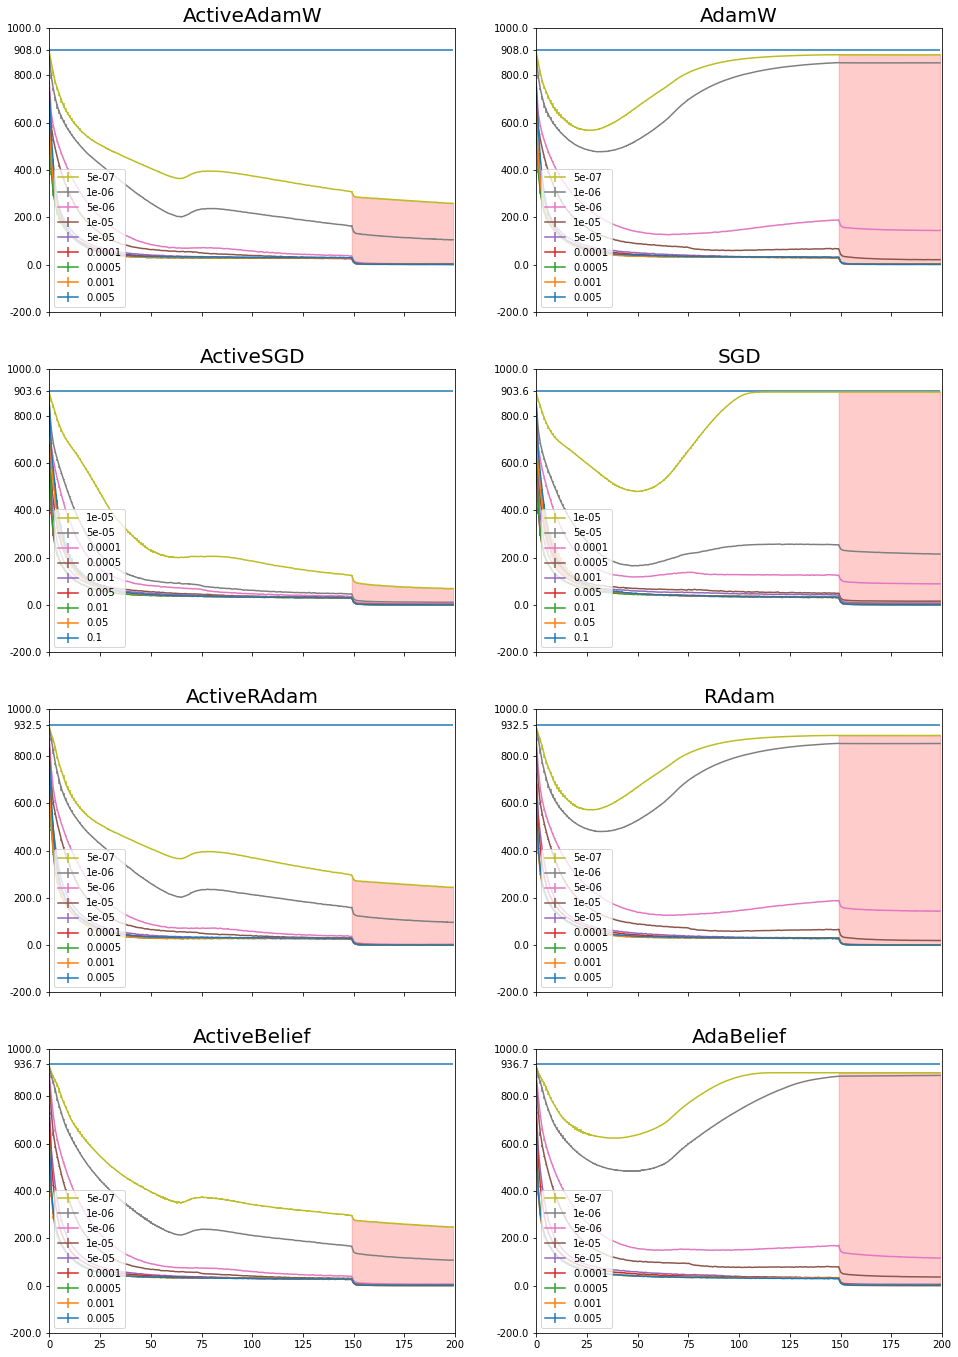

In [13]:
optimDict = {'activeadam':'ActiveAdamW', 
                       'activebelief': 'ActiveBelief', 
                       'activeradam': 'ActiveRAdam', 
                       'activesgd': 'ActiveSGD', 
                       'adamw': 'AdamW', 
                       'adabelief': 'AdaBelief',
                       'radam': 'RAdam', 
                       'sgd': 'SGD'}
optimList = [
    ('activeadam', 'adamw'),
    ('activesgd', 'sgd'),
    ('activeradam', 'radam'),
    ('activebelief', 'adabelief')
]
threshDict={'activeadam':5e-7, 
                       'activebelief':5e-7, 
                       'activeradam':5e-7, 
                       'activesgd':1e-5, 
                       'adamw':5e-7, 
                       'adabelief':5e-7,
                       'radam':5e-7, 
                       'sgd':1e-5,    
}

fig, axes = plt.subplots(4,2, figsize=(16,24), sharex=True)
for ii, (optim1, optim2) in enumerate(optimList):
    print(ii, optim1, optim2)

    lrs = sorted(list(set([get_hp(f)['lr'] for f in files if get_hp(f)['optimizer']==optim1])), reverse=True)
    lr2c=dict()
    for lr in lrs:
        index = lrs.index(lr)
        if index>17:
            index-=18
        lr2c[lr]=cmap(index*2)


    test_accs1=defaultdict(lambda : [])
    test_accs2=defaultdict(lambda : [])
    for log in logs:
        optimizer = log['optimizer']
        if optimizer!=optim1 and optimizer!=optim2 : continue
        lr = log['lr']
        seed = log['seed']
    #     if lr<1e-6: continue
        if optimizer==optim1:
            test_accs1[lr].append(log['train_loss'])
        else:
            test_accs2[lr].append(log['train_loss'])
    

# linesty = {optim1: '-', optim2: 'dotted'}
    alpha = .2

    thresh = threshDict[optim1]
    threshH = 1 

    test_acc1=[]
    test_acc2=[]
    maxi1=maxi2=0
    for lr in test_accs1.keys():
        optimizer = optim1
    #     if optimizer!=optim1 and optimizer!=optim2 : continue

    #     linestyle = linesty[optimizer]
    #     lr = log['lr']
    #     seed = log['seed']
        if lr<thresh: continue
    #     lr = log['lr']
    #     wd = log['wd']
    #     if optimizer==optim1:
    #         test_accs1[lr].append(log['test_acc'])
    #     else:
    #         test_accs2[lr].append(log['test_acc'])
    #     print(f'{optimizer} with seed {seed} and lr {lr} added')
    #     if optimizer==optim1:
        arr = np.array(test_accs1[lr])
        print(f'{optimizer}: {lr}; {arr.shape}')
        avg = arr.mean(0)
        std = arr.std(0)
        if maxi1<arr.max():
            maxi1=arr.max()

        test_acc1.append(avg)

        axes[ii,0].errorbar(range(200),avg, yerr=std, label=f"{lr}", c=lr2c[lr])
#         axes[ii,0].fill_between(range(200), avg-std, avg+std, color=lr2c[lr], alpha=alpha)

    for lr in test_accs2.keys():
        if lr<thresh: continue
        optimizer = optim2
        arr = np.array(test_accs2[lr])
        print(f'{optimizer}: {lr}; {arr.shape}')
        avg = arr.mean(0)
        std = arr.std(0)

        if maxi2<arr.max():
            maxi2=arr.max()

        test_acc2.append(avg)

        axes[ii,1].errorbar(range(200),avg, yerr=std, label=f"{lr}", c=lr2c[lr])
#         axes[ii,1].fill_between(range(200), avg-std, avg+std, color=lr2c[lr], alpha=alpha)

    #         axes[0].plot(train_acc, label=f"{lr}", c=lr2c[lr], linestyle=linestyle)
        #         axes[0].set_ylim(70.5,100)
    #     axes.set_xlim(149,200)
    test_acc1 = np.array(test_acc1)
    test_acc2 = np.array(test_acc2)
    max1 = test_acc1.max(0)
    max2 = test_acc2.max(0)
    min1 = test_acc1.min(0)
    min2 = test_acc2.min(0)

    axes[ii,0].fill_between(range(149,200), min1[149:], max1[149:], color='red', alpha=.2)
    axes[ii,1].fill_between(range(149,200), min2[149:], max2[149:], color='red', alpha=0.2)

    # axes.set_ylim(85, 95.7)
    axes[ii,0].set_xlim(0,200)
    axes[ii,1].set_xlim(0,200)

    axes[ii,0].hlines(maxi1, 0, 199)
    # axes[0].hlines(min1, 0, 199)
    yticks0 = axes[ii,0].get_yticks()
    yt0 = list(yticks0)
    yt0.append(maxi1)
    axes[ii,0].set_yticks(yt0)

    axes[ii,1].hlines(maxi2, 0, 199)
    # axes[1].hlines(min2, 0, 199)
    yticks1 = axes[ii,1].get_yticks()
    yt1 = list(yticks1)
    yt1.append(maxi2)
    axes[ii,1].set_yticks(yt1)

    axes[ii,0].yaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
    axes[ii,1].yaxis.set_major_formatter(FormatStrFormatter('%0.1f'))

    axes[ii,0].set_title(optimDict[optim1])
    axes[ii,1].set_title(optimDict[optim2])
    axes[ii,0].legend(loc='lower left')
    axes[ii,1].legend(loc='lower left')

Separate plots

In [18]:
plt.rcParams['figure.figsize']

[6.0, 4.0]

0 activeadam
activeadam: 5e-07; (3, 200)
activeadam: 1e-06; (3, 200)
activeadam: 5e-06; (3, 200)
activeadam: 1e-05; (3, 200)
activeadam: 5e-05; (3, 200)
activeadam: 0.0001; (3, 200)
activeadam: 0.0005; (3, 200)
activeadam: 0.001; (3, 200)
activeadam: 0.005; (3, 200)
1 adamw
adamw: 5e-07; (3, 200)
adamw: 1e-06; (3, 200)
adamw: 5e-06; (3, 200)
adamw: 1e-05; (3, 200)
adamw: 5e-05; (3, 200)
adamw: 0.0001; (3, 200)
adamw: 0.0005; (3, 200)
adamw: 0.001; (3, 200)
adamw: 0.005; (3, 200)
2 activesgd
activesgd: 1e-05; (3, 200)
activesgd: 5e-05; (3, 200)
activesgd: 0.0001; (3, 200)
activesgd: 0.0005; (3, 200)
activesgd: 0.001; (3, 200)
activesgd: 0.005; (3, 200)
activesgd: 0.01; (3, 200)
activesgd: 0.05; (3, 200)
activesgd: 0.1; (3, 200)
3 sgd
sgd: 1e-05; (3, 200)
sgd: 5e-05; (3, 200)
sgd: 0.0001; (3, 200)
sgd: 0.0005; (3, 200)
sgd: 0.001; (3, 200)
sgd: 0.005; (3, 200)
sgd: 0.01; (3, 200)
sgd: 0.05; (3, 200)
sgd: 0.1; (3, 200)
4 activeradam
activeradam: 5e-07; (3, 200)
activeradam: 1e-06; (3, 200

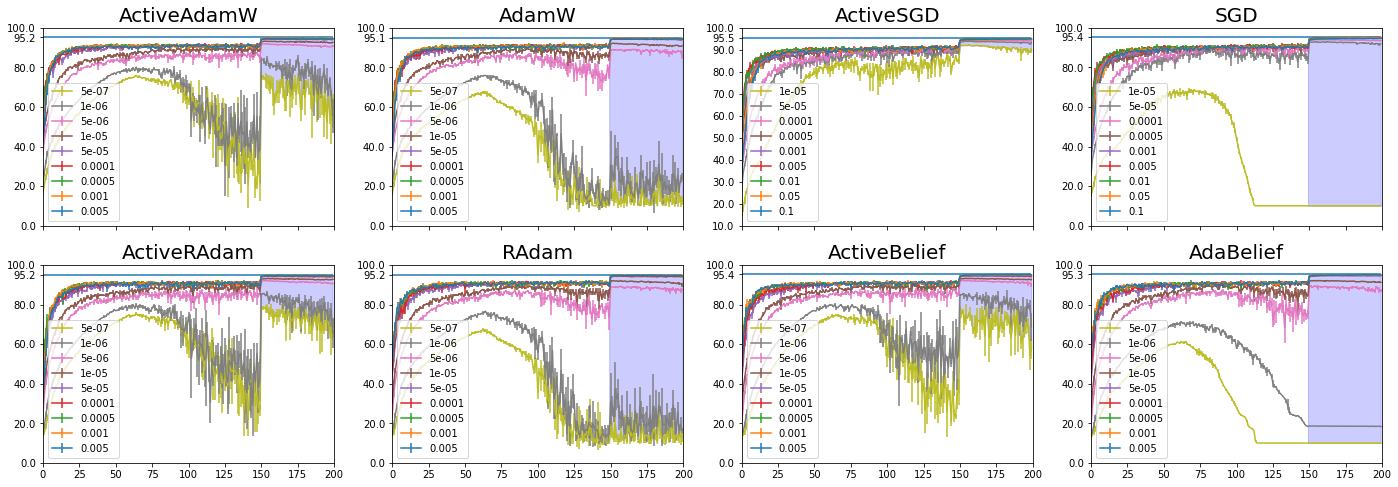

In [22]:
optimDict = {'activeadam':'ActiveAdamW', 
                       'activebelief': 'ActiveBelief', 
                       'activeradam': 'ActiveRAdam', 
                       'activesgd': 'ActiveSGD', 
                       'adamw': 'AdamW', 
                       'adabelief': 'AdaBelief',
                       'radam': 'RAdam', 
                       'sgd': 'SGD'}
optimList = [
    'activeadam', 'adamw',
    'activesgd', 'sgd',
    'activeradam', 'radam',
    'activebelief', 'adabelief',
]
threshDict={'activeadam':5e-7, 
                       'activebelief':5e-7, 
                       'activeradam':5e-7, 
                       'activesgd':1e-5, 
                       'adamw':5e-7, 
                       'adabelief':5e-7,
                       'radam':5e-7, 
                       'sgd':1e-5,    
}

fig, axes = plt.subplots(2,4, figsize=(24,8), sharex=True)
for ii, (optim1,ax) in enumerate(zip(optimList, axes.flatten())):
    print(ii, optim1)

    lrs = sorted(list(set([get_hp(f)['lr'] for f in files if get_hp(f)['optimizer']==optim1])), reverse=True)
    lr2c=dict()
    for lr in lrs:
        index = lrs.index(lr)
        if index>17:
            index-=18
        lr2c[lr]=cmap(index*2)


    test_accs1=defaultdict(lambda : [])
#     test_accs2=defaultdict(lambda : [])
    for log in logs:
        optimizer = log['optimizer']
        if optimizer!=optim1 : continue
        lr = log['lr']
        seed = log['seed']
    #     if lr<1e-6: continue
        test_accs1[lr].append(log['test_acc'])   

# linesty = {optim1: '-', optim2: 'dotted'}
    alpha = .2

    thresh = threshDict[optim1]
    threshH = 1 

    test_acc1=[]
#     test_acc2=[]
    maxi1=0
    for lr in test_accs1.keys():
        optimizer = optim1
    #     if optimizer!=optim1 and optimizer!=optim2 : continue

    #     linestyle = linesty[optimizer]
    #     lr = log['lr']
    #     seed = log['seed']
        if lr<thresh: continue
    #     lr = log['lr']
    #     wd = log['wd']
    #     if optimizer==optim1:
    #         test_accs1[lr].append(log['test_acc'])
    #     else:
    #         test_accs2[lr].append(log['test_acc'])
    #     print(f'{optimizer} with seed {seed} and lr {lr} added')
    #     if optimizer==optim1:
        arr = np.array(test_accs1[lr])
        print(f'{optimizer}: {lr}; {arr.shape}')
        avg = arr.mean(0)
        std = arr.std(0)
        if maxi1<arr.max():
            maxi1=arr.max()

        test_acc1.append(avg)

        ax.errorbar(range(200),avg, yerr=std, label=f"{lr}", c=lr2c[lr])
#         axes[ii,0].fill_between(range(200), avg-std, avg+std, color=lr2c[lr], alpha=alpha)

#     for lr in test_accs2.keys():
#         if lr<thresh: continue
#         optimizer = optim2
#         arr = np.array(test_accs2[lr])
#         print(f'{optimizer}: {lr}; {arr.shape}')
#         avg = arr.mean(0)
#         std = arr.std(0)

#         if maxi2<arr.max():
#             maxi2=arr.max()

#         test_acc2.append(avg)

#         axes[ii,1].errorbar(range(200),avg, yerr=std, label=f"{lr}", c=lr2c[lr])
#         axes[ii,1].fill_between(range(200), avg-std, avg+std, color=lr2c[lr], alpha=alpha)

    #         axes[0].plot(train_acc, label=f"{lr}", c=lr2c[lr], linestyle=linestyle)
        #         axes[0].set_ylim(70.5,100)
    #     axes.set_xlim(149,200)
    test_acc1 = np.array(test_acc1)
#     test_acc2 = np.array(test_acc2)
    max1 = test_acc1.max(0)
#     max2 = test_acc2.max(0)
    min1 = test_acc1.min(0)
#     min2 = test_acc2.min(0)

    ax.fill_between(range(149,200), min1[149:], max1[149:], color='blue', alpha=.2)
#     axes[ii,1].fill_between(range(149,200), min2[149:], max2[149:], color='red', alpha=0.2)

    # axes.set_ylim(85, 95.7)
    ax.set_xlim(0,200)
#     axes[ii,1].set_xlim(0,200)

    ax.hlines(maxi1, 0, 199)
    # axes[0].hlines(min1, 0, 199)
    yticks0 = ax.get_yticks()
    yt0 = list(yticks0)
    yt0.append(maxi1)
    ax.set_yticks(yt0)

#     axes[ii,1].hlines(maxi2, 0, 199)
#     # axes[1].hlines(min2, 0, 199)
#     yticks1 = axes[ii,1].get_yticks()
#     yt1 = list(yticks1)
#     yt1.append(maxi2)
#     axes[ii,1].set_yticks(yt1)

    ax.yaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
#     axes[ii,1].yaxis.set_major_formatter(FormatStrFormatter('%0.1f'))

    ax.set_title(optimDict[optim1])
#     axes[ii,1].set_title(optimDict[optim2])
    ax.legend(loc='lower left')
#     axes[ii,1].legend(loc='lower left')

In [23]:
fig.savefig('./cifar10accs.png', dpi=300, bbox_inches='tight')

## train losses

Separate plots

In [18]:
plt.rcParams['figure.figsize']

[6.0, 4.0]

0 activeadam
activeadam: 5e-07; (3, 200)
activeadam: 1e-06; (3, 200)
activeadam: 5e-06; (3, 200)
activeadam: 1e-05; (3, 200)
activeadam: 5e-05; (3, 200)
activeadam: 0.0001; (3, 200)
activeadam: 0.0005; (3, 200)
activeadam: 0.001; (3, 200)
activeadam: 0.005; (3, 200)
1 adamw
adamw: 5e-07; (3, 200)
adamw: 1e-06; (3, 200)
adamw: 5e-06; (3, 200)
adamw: 1e-05; (3, 200)
adamw: 5e-05; (3, 200)
adamw: 0.0001; (3, 200)
adamw: 0.0005; (3, 200)
adamw: 0.001; (3, 200)
adamw: 0.005; (3, 200)
2 activesgd
activesgd: 1e-05; (3, 200)
activesgd: 5e-05; (3, 200)
activesgd: 0.0001; (3, 200)
activesgd: 0.0005; (3, 200)
activesgd: 0.001; (3, 200)
activesgd: 0.005; (3, 200)
activesgd: 0.01; (3, 200)
activesgd: 0.05; (3, 200)
activesgd: 0.1; (3, 200)
3 sgd
sgd: 1e-05; (3, 200)
sgd: 5e-05; (3, 200)
sgd: 0.0001; (3, 200)
sgd: 0.0005; (3, 200)
sgd: 0.001; (3, 200)
sgd: 0.005; (3, 200)
sgd: 0.01; (3, 200)
sgd: 0.05; (3, 200)
sgd: 0.1; (3, 200)
4 activeradam
activeradam: 5e-07; (3, 200)
activeradam: 1e-06; (3, 200

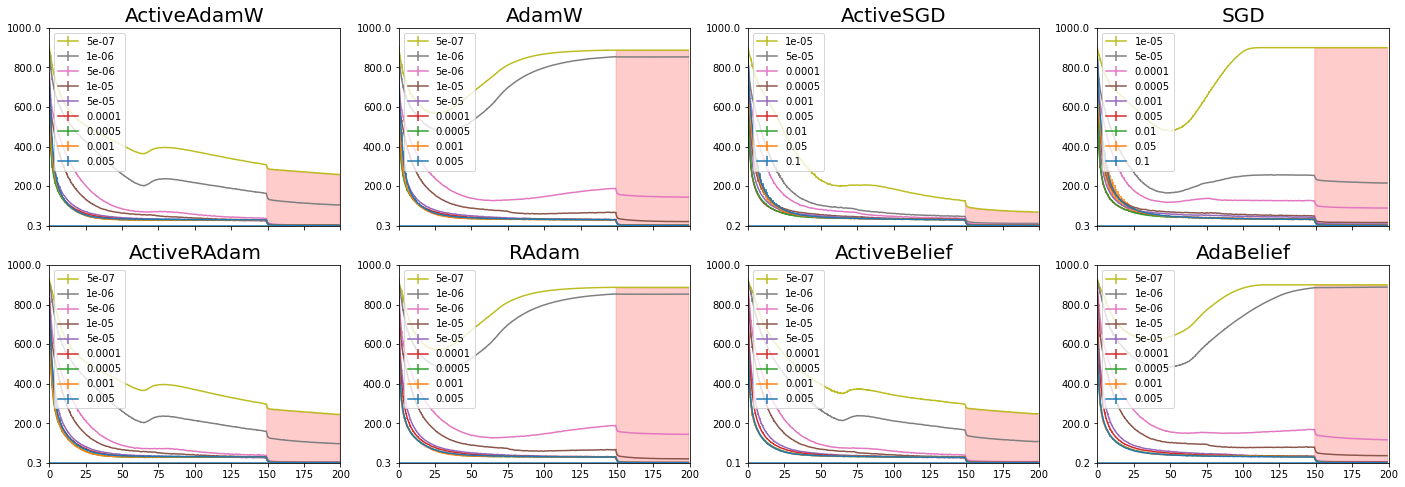

In [24]:
optimDict = {'activeadam':'ActiveAdamW', 
                       'activebelief': 'ActiveBelief', 
                       'activeradam': 'ActiveRAdam', 
                       'activesgd': 'ActiveSGD', 
                       'adamw': 'AdamW', 
                       'adabelief': 'AdaBelief',
                       'radam': 'RAdam', 
                       'sgd': 'SGD'}
optimList = [
    'activeadam', 'adamw',
    'activesgd', 'sgd',
    'activeradam', 'radam',
    'activebelief', 'adabelief',
]
threshDict={'activeadam':5e-7, 
                       'activebelief':5e-7, 
                       'activeradam':5e-7, 
                       'activesgd':1e-5, 
                       'adamw':5e-7, 
                       'adabelief':5e-7,
                       'radam':5e-7, 
                       'sgd':1e-5,    
}

fig, axes = plt.subplots(2,4, figsize=(24,8), sharex=True)
for ii, (optim1,ax) in enumerate(zip(optimList, axes.flatten())):
    print(ii, optim1)

    lrs = sorted(list(set([get_hp(f)['lr'] for f in files if get_hp(f)['optimizer']==optim1])), reverse=True)
    lr2c=dict()
    for lr in lrs:
        index = lrs.index(lr)
        if index>17:
            index-=18
        lr2c[lr]=cmap(index*2)


    test_accs1=defaultdict(lambda : [])
    for log in logs:
        optimizer = log['optimizer']
        if optimizer!=optim1 : continue
        lr = log['lr']
        seed = log['seed']
        test_accs1[lr].append(log['train_loss'])   

    alpha = .2

    thresh = threshDict[optim1]
    threshH = 1 

    test_acc1=[]
    maxi1=float('inf')
    for lr in test_accs1.keys():
        optimizer = optim1

        if lr<thresh: continue

        arr = np.array(test_accs1[lr])
        print(f'{optimizer}: {lr}; {arr.shape}')
        avg = arr.mean(0)
        std = arr.std(0)
        if maxi1>arr.min():
            maxi1=arr.min()

        test_acc1.append(avg)

        ax.errorbar(range(200),avg, yerr=std, label=f"{lr}", c=lr2c[lr])

    test_acc1 = np.array(test_acc1)
#     test_acc2 = np.array(test_acc2)
    max1 = test_acc1.max(0)
    min1 = test_acc1.min(0)

    ax.fill_between(range(149,200), min1[149:], max1[149:], color='red', alpha=.2)

    ax.set_xlim(0,200)
    ax.set_ylim(0)


    ax.hlines(maxi1, 0, 199)
    yticks0 = ax.get_yticks()
    yt0 = list(yticks0)
    yt0.append(maxi1)
    yt0.remove(0)
    ax.set_yticks(yt0)

    ax.yaxis.set_major_formatter(FormatStrFormatter('%0.1f'))

    ax.set_title(optimDict[optim1])
    ax.legend(loc='upper left')

In [25]:
fig.savefig('./cifar10loss.png', dpi=300, bbox_inches='tight')

# lrLow and lrHigh finder

In [31]:
import random

In [42]:
%matplotlib inline

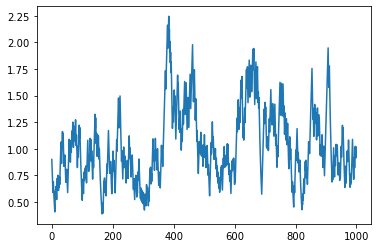

In [89]:
low = .9
high = .1
init = 1.
l=[]
for _ in range(1000):
    if random.random()>.5:
        init +=high
    else:
        init *= low
    l.append(init)
plt.plot(l)
plt.show()